# Taller N°2


### Kevin Eduardo Garcia Rodirguez 

### Metodos Numericos 2025B 28/10/2025

* Se debe presentar:
    * Ejercicios y sus graficas
    * Enlace al repositorio es:
    https://github.com/Nattyrd/Metodos-Numericos-2025B/tree/main/Deberes/Taller2

## 📋 Indicaciones

- Incluir una **gráfica de las curvas** y el **corte con el eje**, además, una **animación del proceso iterativo del algoritmo seleccionado para cada literal**.  
- Utilizar el **método de Newton** y el **método de la Bisección** para resolver los ejercicios planteados.  
  Utilice funciones únicamente de la librería **`scipy`**.  
- **NO USAR CHATGPT (ni similares).**  
- Subir **archivo PDF** y **enlace de repositorio público en GitHub**.

1. Encuentre todas las raíces del polinomio  
   $$
   x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0
   $$


  


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from scipy.optimize import newton


In [2]:
def f(x):
    return  x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def f_prime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

In [13]:
print(newton(f, x0= 0.75, fprime=f_prime, tol=1e-6, maxiter=40))

-125.999979600101


In [22]:
def newton_tabla(f, fprime, x0, tol=1e-6, max_iter=20):
    print("\nIteraciones del método de Newton-Raphson:\n")
    print("{:<10}{:<15}{:<20}{:<20}".format("Iter", "x_n", "f(x_n)", "Error"))
    print("-" * 65)
    
    x = x0
    x_steps = [x0]  # Guardamos el valor inicial
    
    for i in range(1, max_iter + 1):
        fx = f(x)
        dfx = fprime(x)
        
        if dfx == 0:
            print("Derivada nula. No se puede continuar.")
            break
        
        x_new = x - fx / dfx
        error = abs(x_new - x)
        
        print("{:<10}{:<15.6f}{:<20.10f}{:<20.10f}".format(i, x, fx, error))
        
        x_steps.append(x_new)
        
        if error < tol:
            break
        
        x = x_new
    
    return x_new, x_steps

In [24]:
raiz,x_steps = newton_tabla(f, f_prime, x0=0.75)



Iteraciones del método de Newton-Raphson:

Iter      x_n            f(x_n)              Error               
-----------------------------------------------------------------
1         0.750000       335586506.378906250033.7400678194       
2         -32.990068     106052513.102677404925.2438928328       
3         -58.233961     33485729.1328604817 18.8546786642       
4         -77.088639     10557624.9256610870 14.0421708155       
5         -91.130810     3320698.6414506435  10.4087617788       
6         -101.539572    1040398.4722572565  7.6569080870        
7         -109.196480    323945.4256744385   5.5650229542        
8         -114.761503    99892.3882806301    3.9698611311        
9         -118.731364    30352.8068969250    2.7538985257        
10        -121.485263    9027.8390352726     1.8360071265        
11        -123.321270    2609.1175775528     1.1622991649        
12        -124.483569    728.7110981941      0.6934521602        
13        -125.177021    196.621

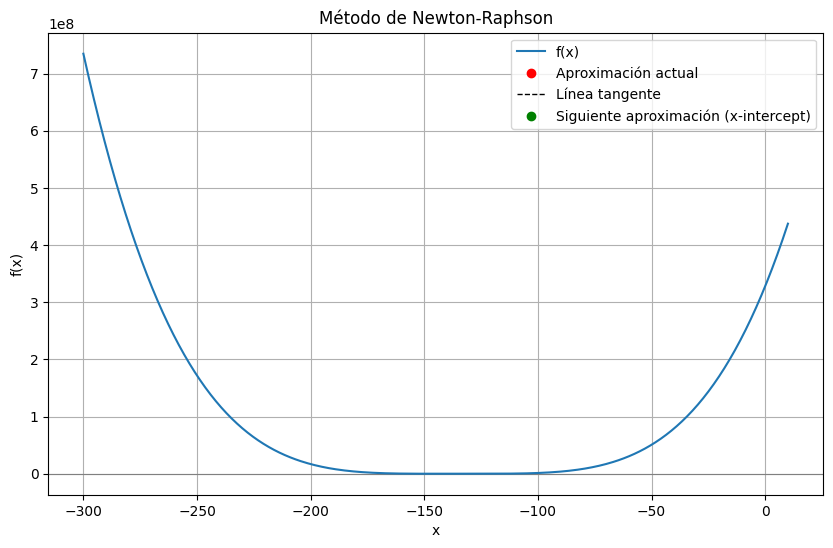

In [35]:
# Rango para graficar la función
# Basado en el análisis previo, la función tiene un mínimo negativo alrededor de x=-150
# y dos raíces reales. El punto inicial 0.75 converge a la raíz menos negativa.
# Graficaremos un rango que incluya el punto inicial y la posible zona de la raíz.
# Ajusta este rango si es necesario para visualizar mejor.
x_plot = np.linspace(-300, 10, 400)
y_plot = f(x_plot)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Método de Newton-Raphson")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.axhline(0, color='grey', lw=0.8) # Eje x

# Graficar la función
line_func, = ax.plot(x_plot, y_plot, label="f(x)")

# Inicializar elementos para la animación
point, = ax.plot([], [], 'ro', label="Aproximación actual") # Punto (x_k, f(x_k))
tangent_line, = ax.plot([], [], 'k--', lw=1, label="Línea tangente") # Línea tangente
next_x_intercept, = ax.plot([], [], 'go', label="Siguiente aproximación (x-intercept)") # Punto (x_{k+1}, 0)

ax.legend()

def init():
    point.set_data([], [])
    tangent_line.set_data([], [])
    next_x_intercept.set_data([], [])
    return point, tangent_line, next_x_intercept

# Función de actualización para cada frame de la animación
def update(frame):
    x_k = x_steps[frame]
    y_k = f(x_k)
    f_prime_k = f_prime(x_k)

    # Actualizar el punto actual
    point.set_data([x_k], [y_k])

    # Calcular y actualizar la línea tangente
    # La línea tangente pasa por (x_k, y_k) con pendiente f_prime_k
    # Su ecuación es y - y_k = f_prime_k * (x - x_k)
    # Para dibujarla, usamos dos puntos: (x_k, y_k) y el siguiente punto (x_{k+1}, 0)
    if frame + 1 < len(x_steps):
        x_k_plus_1 = x_steps[frame + 1]
        tangent_x = [x_k, x_k_plus_1]
        tangent_y = [y_k, 0] # El siguiente punto está en el eje x
        next_x_intercept.set_data([x_k_plus_1], [0])
    else:
        # Para el último paso, dibujamos la tangente usando un pequeño rango alrededor de x_k
        tangent_x = np.linspace(x_k - 10, x_k + 10, 2) # Ajusta el rango si es necesario
        tangent_y = y_k + f_prime_k * (tangent_x - x_k)
        next_x_intercept.set_data([], []) # No hay siguiente punto

    tangent_line.set_data(tangent_x, tangent_y)

    # Actualizar el título
    ax.set_title(f"Iteración {frame}: $x_{frame}$ = {x_k:.6f}")

    # Ajustar los límites del eje x para seguir la animación si es necesario
    # ax.set_xlim(min(x_steps) - 10, max(x_steps) + 10) # Esto puede hacer que la gráfica se mueva mucho

    return point, tangent_line, next_x_intercept

# Crear la animación
# interval: Retraso entre frames en ms
# repeat: Si la animación debe repetirse
ani = animation.FuncAnimation(fig, update, frames=len(x_steps), init_func=init, blit=True, interval=500, repeat= True)

# Para guardar la animación (requiere ffmpeg o Pillow)
# ani.save('newton_raphson.gif', writer='pillow')
# ani.save('newton_raphson.mp4', writer='ffmpeg')

plt.show()

2. Encuentre todos los puntos en los que la curva  
   $$
   \left(\frac{y}{2}\right)^2 = \left(\frac{x + 3}{2}\right)^2 - 1
   $$
   intersecta el eje $y = -2$.



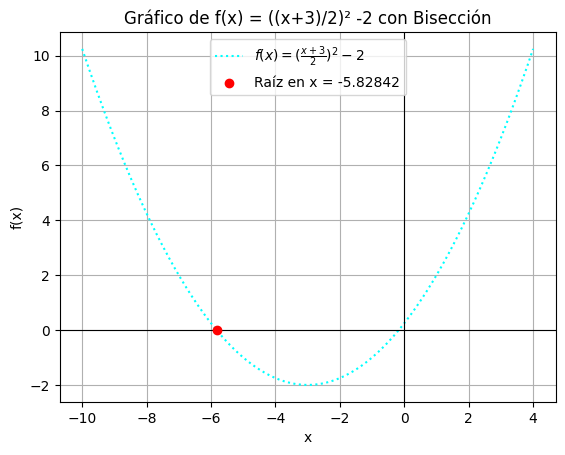

Raíz encontrada: x = -5.82842


In [42]:

# Definir la función f(x)
def f(x):
    return (((x+3)/2)**2 - 2 )

# Algoritmo de bisección
def bisection_method(f, a, b, tol=1e-5, max_iter=1000):
    # Verificar que los signos de f(a) y f(b) sean opuestos
    if f(a) * f(b) >= 0:
        print("No se puede aplicar el método de bisección. Los signos de f(a) y f(b) deben ser opuestos.")
        return None
    
    iter_count = 0
    while (b - a) / 2.0 > tol:
        # Punto medio
        c = (a + b) / 2.0
        # Verificar si el punto medio es una raíz
        if f(c) == 0:
            return c
        # Actualizar el intervalo
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        
        iter_count += 1
        if iter_count > max_iter:
            print("Se alcanzó el número máximo de iteraciones.")
            return None
    
    return (a + b) / 2.0

# Definir el rango de valores para x
x = np.linspace(-10, 4, 800)
y = f(x)

# Graficar la función con la línea de puntos
plt.plot(x, y, label=r'$f(x) = (\frac{x+3}{2})^2-2$', color='cyan', linestyle=':')

# Definir el intervalo [a, b] donde se busca la raíz
a = -8
b = -4

# Llamar al método de bisección
root = bisection_method(f, a, b)

# Mostrar la raíz encontrada en la gráfica
if root is not None:
    plt.scatter(root, f(root), color='red', zorder=5, label=f'Raíz en x = {root:.5f}')

# Agregar título y etiquetas
plt.title('Gráfico de f(x) = ((x+3)/2)² -2 con Bisección')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar la cuadrícula y los ejes
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)  # Eje X
plt.axvline(0, color='black', linewidth=0.8)  # Eje Y
plt.legend()
plt.show()
if root is not None:
    print(f'Raíz encontrada: x = {root:.5f}')

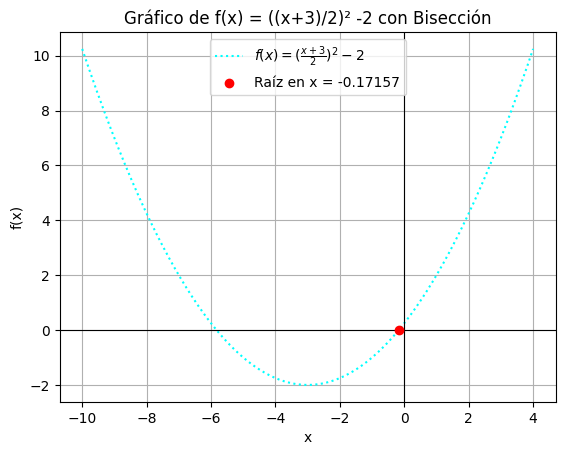

Raíz encontrada: x = -0.17157


In [43]:
# Definir la función f(x)
def f(x):
    return (((x+3)/2)**2 - 2 )

# Algoritmo de bisección
def bisection_method(f, a, b, tol=1e-5, max_iter=1000):
    # Verificar que los signos de f(a) y f(b) sean opuestos
    if f(a) * f(b) >= 0:
        print("No se puede aplicar el método de bisección. Los signos de f(a) y f(b) deben ser opuestos.")
        return None
    
    iter_count = 0
    while (b - a) / 2.0 > tol:
        # Punto medio
        c = (a + b) / 2.0
        # Verificar si el punto medio es una raíz
        if f(c) == 0:
            return c
        # Actualizar el intervalo
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        
        iter_count += 1
        if iter_count > max_iter:
            print("Se alcanzó el número máximo de iteraciones.")
            return None
    
    return (a + b) / 2.0

# Definir el rango de valores para x
x = np.linspace(-10, 4, 800)
y = f(x)

# Graficar la función con la línea de puntos
plt.plot(x, y, label=r'$f(x) = (\frac{x+3}{2})^2-2$', color='cyan', linestyle=':')

# Definir el intervalo [a, b] donde se busca la raíz
a = -4
b = 2

# Llamar al método de bisección
root = bisection_method(f, a, b)

# Mostrar la raíz encontrada en la gráfica
if root is not None:
    plt.scatter(root, f(root), color='red', zorder=5, label=f'Raíz en x = {root:.5f}')

# Agregar título y etiquetas
plt.title('Gráfico de f(x) = ((x+3)/2)² -2 con Bisección')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar la cuadrícula y los ejes
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)  # Eje X
plt.axvline(0, color='black', linewidth=0.8)  # Eje Y

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

# Mostrar la raíz en consola
if root is not None:
    print(f'Raíz encontrada: x = {root:.5f}')

3. Dada la función  
   $$
   f(x) = \frac{\sin(x)}{x}
   $$
   ¿A partir de qué valor $x_T$ se cumple que  
   $$
   f(x) < 0.015,\ \forall x \ge x_T ?
   $$

C:\Users\NattyrdGT\AppData\Local\Temp\ipykernel_5080\4278763823.py:3: RuntimeWarning: invalid value encountered in divide
  return np.where(x != 0, np.sin(x) / x, 1.0)


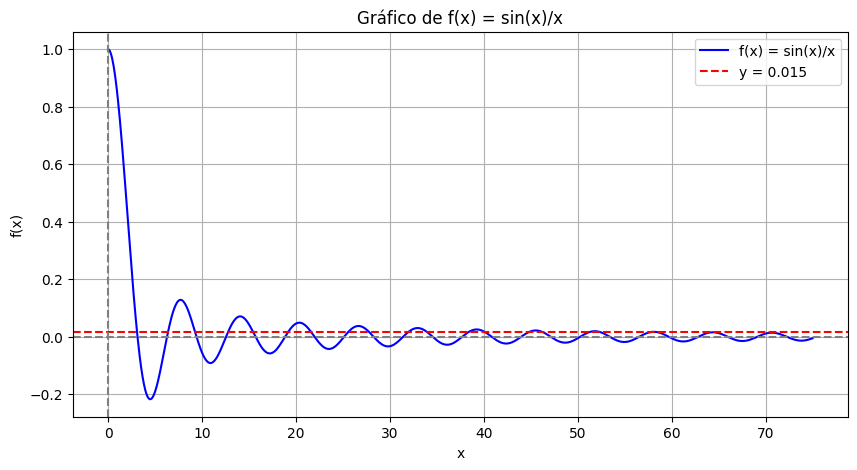

In [44]:
# Definir la función f(x) = sin(x)/x, con f(0) = 1
def f(x):
    return np.where(x != 0, np.sin(x) / x, 1.0)

# Crear un rango de valores de x
x = np.linspace(0, 75, 1000)
y = f(x)

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = sin(x)/x', color='blue')
plt.axhline(0.015, color='red', linestyle='--', label='y = 0.015') 
plt.axhline(0, color='gray', linestyle='--')  # Eje x
plt.axvline(0, color='gray', linestyle='--')  # Eje y
plt.title('Gráfico de f(x) = sin(x)/x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

In [45]:
# Definir la función f(x)
def f(x):
    return np.sin(x) / x if x != 0 else 1.0

# Umbral dado
umbral = 0.015

# Paso de búsqueda (precisión)
step = 0.01
x = 1.0  # Empezamos desde x = 1 para evitar x = 0

# Buscar el primer x_T tal que |f(x)| < umbral para todo x >= x_T
while True:
    valores = [abs(f(x + i * step)) for i in range(1000)]  # Evaluar f(x) en un rango
    if all(valor < umbral for valor in valores):
        x_T = x
        break
    x += step

# Mostrar el resultado
print(f"El valor de x_T aproximado es: {x_T:.4f}")

El valor de x_T aproximado es: 64.6500
